# PRCP-1000: Portuguese Bank Marketing Campaign
### Objective
Help a Portuguese bank's marketing team identify which customers are likely to subscribe to a term deposit 
using data analysis and predictive modeling.

This project uses customer data from a Portuguese bank to predict whether a customer will subscribe to a term deposit. We'll walk through a complete data science workflow from EDA to model comparison.

##  Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

##  Load Dataset

In [6]:
# Load dataset 
df = pd.read_csv("bank-additional-full.csv", sep=';')
print("Shape of Dataset:", df.shape)


Shape of Dataset: (41188, 21)


In [7]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## 3. Data Cleaning & Exploration

In [4]:
# Check missing values and data types
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

 #### No missing values were found. All columns are complete and ready for exploration.

In [8]:
# Visualizing the distribution of the target variable ('y').
# This shows the percentage of customers who subscribed ('yes') vs. who did not ('no').
# The result highlights class imbalance ‚Äî significantly more 'no' responses than 'yes'.


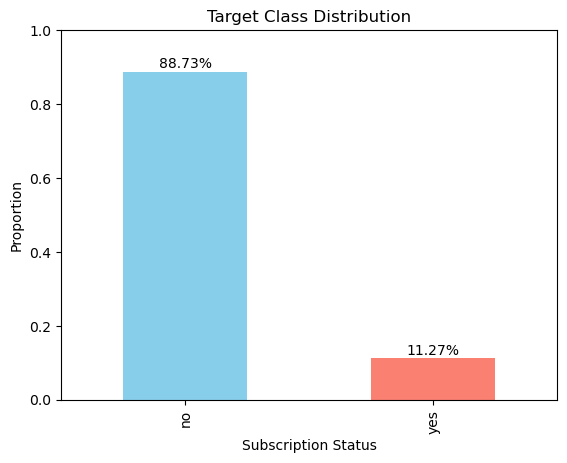

In [9]:
import matplotlib.pyplot as plt

# Get normalized value counts
target_dist = df['y'].value_counts(normalize=True)

# Plot
ax = target_dist.plot(kind='bar', title='Target Class Distribution', color=['skyblue', 'salmon'])
plt.xlabel('Subscription Status')
plt.ylabel('Proportion')

# Add percentage labels on top of bars
for i, val in enumerate(target_dist):
    plt.text(i, val + 0.01, f'{val:.2%}', ha='center')

plt.ylim(0, 1)
plt.show()

 The dataset is imbalanced, with most customers not subscribing to the term deposit.


The bar plot reveals a clear class imbalance in the target variable y. Approximately 88% of the customers did not subscribe to a term deposit, while only around 12% did.
This imbalance is critical to address because machine learning models may otherwise become biased toward predicting the majority class (no).
To ensure fair and effective modeling, especially in classification tasks, we must apply balancing techniques like SMOTE or adjust class weights.

##  Univariate Analysis - Categorical Variables

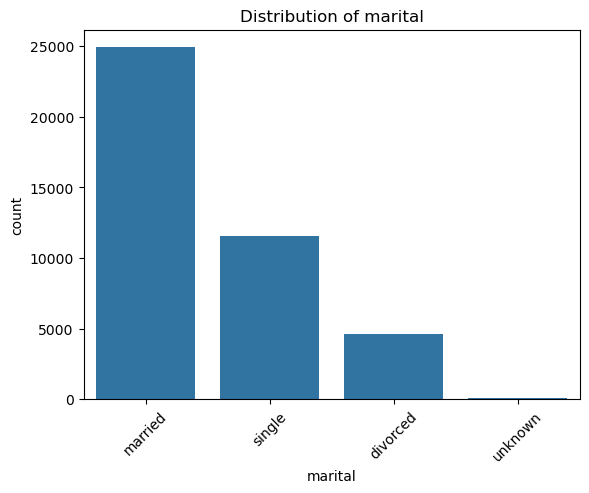

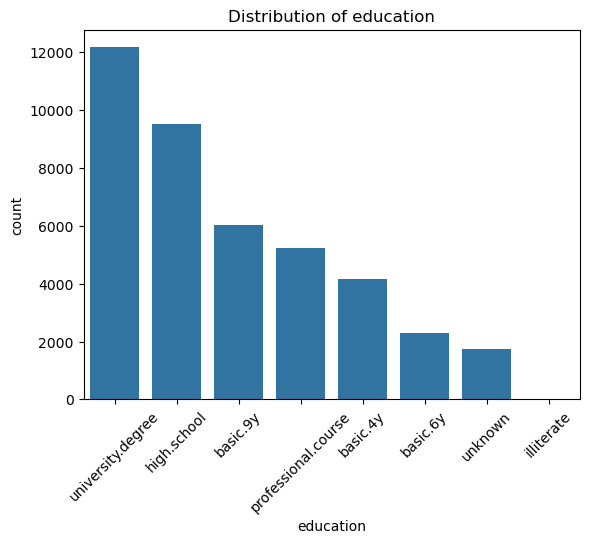

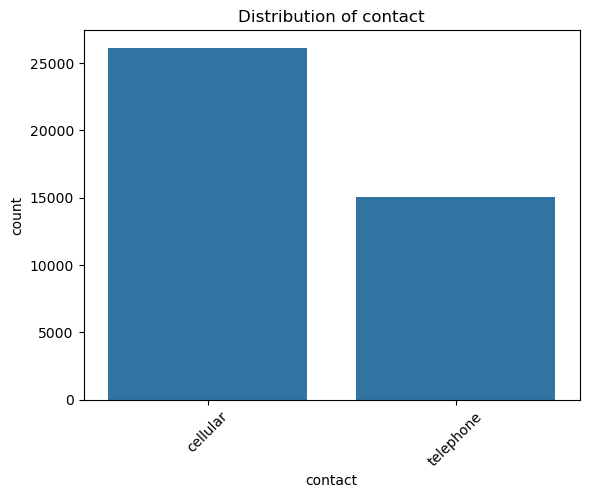

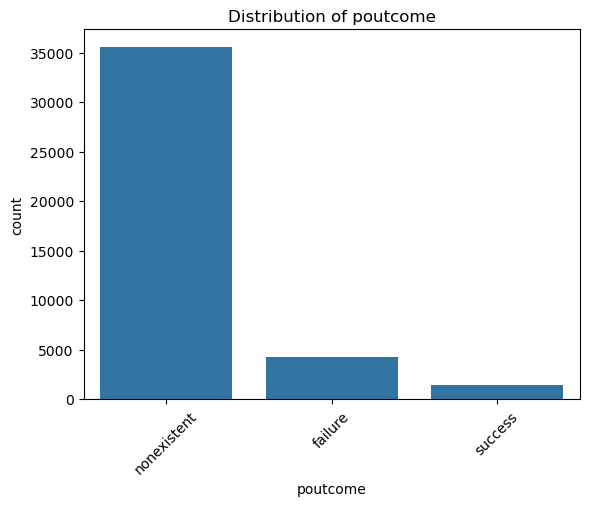

In [10]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

## üìâ Bivariate Analysis - Boxplots for Numerical vs Target

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"{col} by Subscription")
    plt.show()

## ‚ö†Ô∏è Drop Leakage Feature

In [ ]:
df = df.drop('duration', axis=1)
print("'duration' column removed to avoid data leakage.")

## üî§ Encode Categorical Variables

In [ ]:
# Use Label Encoding for simplicity
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print("All categorical columns label-encoded.")

## ‚öñÔ∏è Handle Class Imbalance using SMOTE

In [ ]:
X = df.drop('y', axis=1)
y = df['y']
print("Before SMOTE:", np.bincount(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("After SMOTE:", np.bincount(y_res))

## üß™ Train-Test Split and Feature Scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data split and scaled.")

## ü§ñ Model Training & Evaluation

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = {'Accuracy': acc, 'F1 Score': f1, 'ROC AUC': auc}
    print(f"\n{name} Report:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

pd.DataFrame(results).T

## üìå Feature Importance (XGBoost)

In [ ]:
importances = models['XGBoost'].feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## ‚úÖ Conclusion & Suggestions

- XGBoost outperformed other models on F1 score and ROC AUC.
- Features like contact method, month, and previous campaign outcome were highly influential.
- SMOTE helped address imbalance and improve generalization.
- This model can support better targeting in future marketing efforts.